<a href="https://colab.research.google.com/github/karthikc7/50projects50days/blob/master/Stock%20market%20predct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
!pip install yfinance
import yfinance as yf

In [5]:
# Get the stock quote
df = yf.download('AAPL', start='2023-01-01', end='2023-12-17')
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-11,193.110001,193.490005,191.419998,193.179993,192.672470,60943700
2023-12-12,193.080002,194.720001,191.720001,194.710007,194.198471,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.439926,70404200


In [6]:
#Get the number of rows and columns in the data set
df.shape

(241, 6)

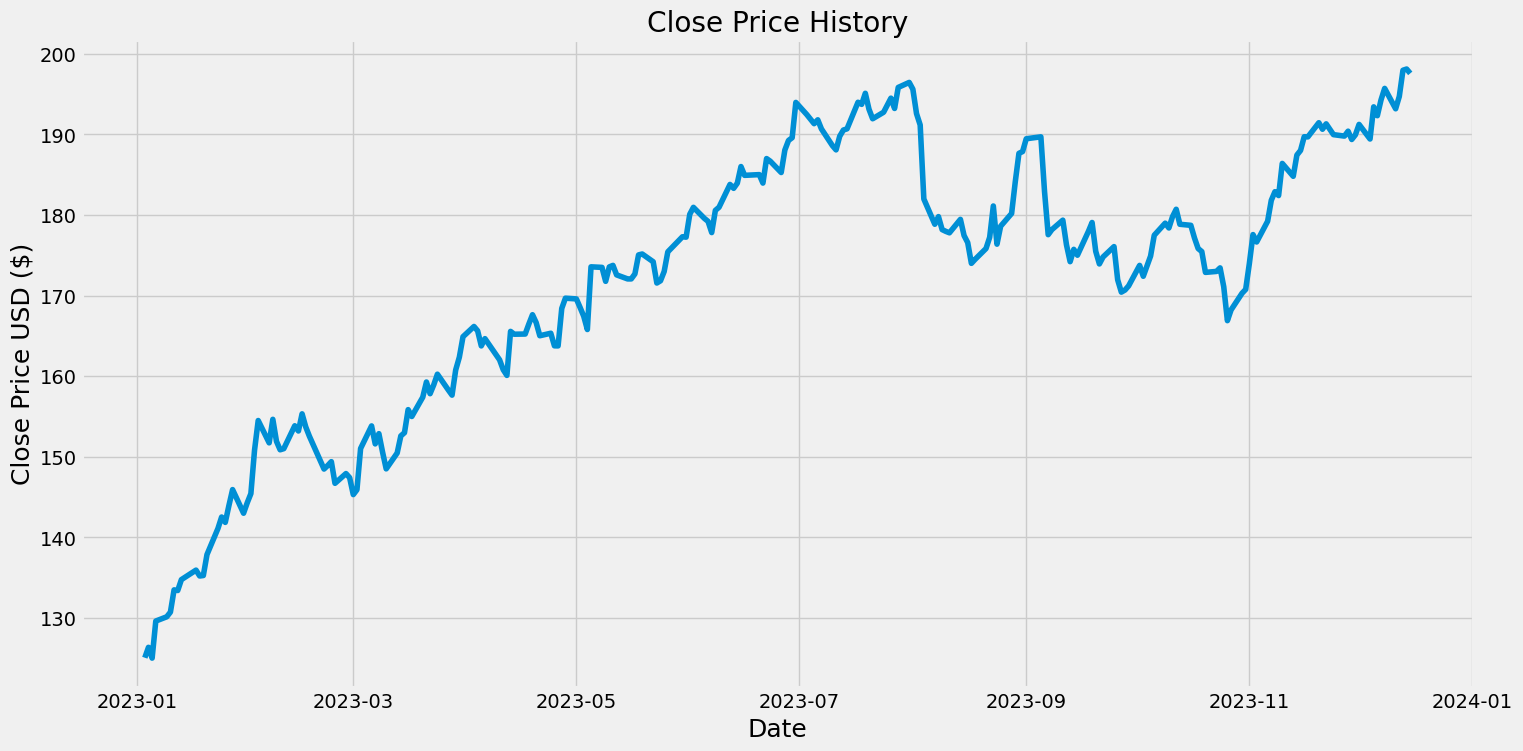

In [7]:
#visualize the closing history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [10]:
#create a new dataframe with only the 'close colum'
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

193

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.84129827e-04],
       [1.83336146e-02],
       [0.00000000e+00],
       [6.29360819e-02],
       [7.01873988e-02],
       [7.81228455e-02],
       [1.15884641e-01],
       [1.14790075e-01],
       [1.33260327e-01],
       [1.49404915e-01],
       [1.39417287e-01],
       [1.40238159e-01],
       [1.75810614e-01],
       [2.20139596e-01],
       [2.39567673e-01],
       [2.30400917e-01],
       [2.59132700e-01],
       [2.86085578e-01],
       [2.45998117e-01],
       [2.63647498e-01],
       [2.79244697e-01],
       [3.52989592e-01],
       [4.03338374e-01],
       [3.65439836e-01],
       [4.05390555e-01],
       [3.68039404e-01],
       [3.53673513e-01],
       [3.55588951e-01],
       [3.94445313e-01],
       [3.85552042e-01],
       [4.14694261e-01],
       [3.92529874e-01],
       [3.76658981e-01],
       [3.20974112e-01],
       [3.26857378e-01],
       [3.33561307e-01],
       [2.96757544e-01],
       [3.13312359e-01],
       [3.06334735e-01],
       [2.77602953e-01],


In [12]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and Y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00068413, 0.01833361, 0.        , 0.06293608, 0.0701874 ,
       0.07812285, 0.11588464, 0.11479007, 0.13326033, 0.14940491,
       0.13941729, 0.14023816, 0.17581061, 0.2201396 , 0.23956767,
       0.23040092, 0.2591327 , 0.28608558, 0.24599812, 0.2636475 ,
       0.2792447 , 0.35298959, 0.40333837, 0.36543984, 0.40539055,
       0.3680394 , 0.35367351, 0.35558895, 0.39444531, 0.38555204,
       0.41469426, 0.39252987, 0.37665898, 0.32097411, 0.32685738,
       0.33356131, 0.29675754, 0.31331236, 0.30633474, 0.27760295,
       0.28581209, 0.35586265, 0.39417162, 0.36366135, 0.38103704,
       0.34984264, 0.32124781, 0.34820089, 0.37720616, 0.38267899,
       0.42180884, 0.41017925, 0.4430154 , 0.46873718, 0.44889866,
       0.46394848, 0.4820085 , 0.45505542, 0.44643584, 0.48912308])]
[0.5108770275070504]

[array([0.00068413, 0.01833361, 0.        , 0.06293608, 0.0701874 ,
       0.07812285, 0.11588464, 0.11479007, 0.13326033, 0.14940491,
       0.13941729, 0.14023816, 0.175

In [13]:
#convert the x-train and y_train to numpay arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(133, 60, 1)

In [15]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

133/133 [==============================] - 8s 32ms/step - loss: 0.0222


In [18]:
#Create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data set X_test and y-test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 13ms/step


In [22]:
#get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

6.010626342877458

<ipython-input-24-3d9c23901f35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


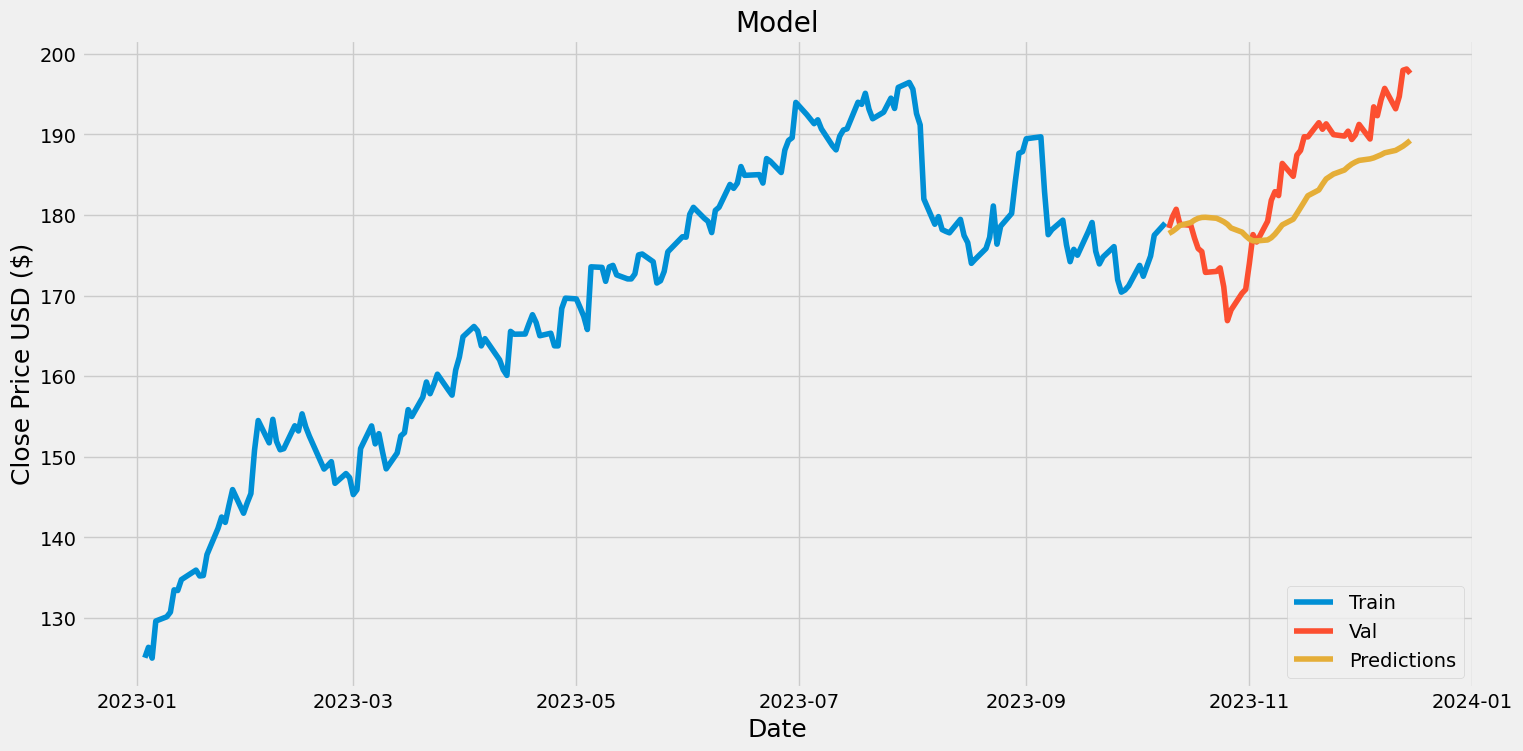

In [24]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-10-10,178.389999,177.706665
2023-10-11,179.800003,177.971191
2023-10-12,180.710007,178.307846
2023-10-13,178.850006,178.700165
2023-10-16,178.720001,179.056305
2023-10-17,177.149994,179.368256
2023-10-18,175.839996,179.587814
2023-10-19,175.460007,179.697205
2023-10-20,172.880005,179.715866


In [28]:
#Get the quote
apple_quote = yf.download('AAPL', start='2023-01-01', end='2023-12-17')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
last_60_days_scaled = scaler.fit_transform(last_60_days)
#create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 24ms/step
[[192.9838]]


In [35]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2023-12-18', end='2023-12-19')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-12-18    195.889999
Name: Close, dtype: float64
